# IMPORT NECCESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic("matplotlib", "inline")
sns.set(style = 'white')

import tqdm

In [2]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, learning_curve

from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


# DATA PROCESSING

## IMPORTING THE DATA FILE

In [5]:

combdata = pd.read_csv("clean_data\\clean_data_r.csv")


## SPLITTING THE TRAIN AND TEST DATA

In [7]:
#selecting/splitting the test and train data 
train = combdata.loc[combdata['source']=="train"]
test = combdata.loc[combdata['source']=="test"]

# Dropping the source column
train.drop(columns = ['source'], inplace = True)
y_test = test['label']
test.drop(labels = ['source', 'label'], axis = 1, inplace = True)
print(f' train shape, {train.shape} \n test shape {test.shape}')
print(y_test)

train shape, (32561, 42) 
 test shape (16281, 41)
32561    0
32562    0
32563    1
32564    1
32565    0
        ..
48837    0
48838    0
48839    0
48840    0
48841    1
Name: label, Length: 16281, dtype: int64


### SPLITTING THE LABELS AND THE FEATURES

In [8]:
#splitting the labels and the features

x_train = train.drop(columns = ['label'])
y_train = train['label'].astype(int)
print(f' Shape of train features {x_train.shape} and train label {y_train.shape}')

Shape of train features (32561, 41) and train label (32561,)


# DIFFERENT MODELS TO BE IMPLEMENTED 


1. K Nearest Neighbour
2. Linear Discriminant Analysis
3. Support Vector Classifier
4. Multi-layer Perceptron classifier
5. Extra Trees Classifier
6. Logistic Regression
7. Decision Trees
8. Random Forest
9. Gradient Boosting Classifier
10. AdaBoost Classifier

## TRAINING THE MODEL

In [9]:
random_state = 3

#creating a list to store the classifiers 
classifiers = []

classifiers.append(KNeighborsClassifier())
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(SVC(random_state = random_state))
classifiers.append(MLPClassifier(random_state = random_state))
classifiers.append(ExtraTreesClassifier(random_state = random_state))
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(DecisionTreeClassifier(random_state = random_state))
classifiers.append(RandomForestClassifier(random_state = random_state))
classifiers.append(GradientBoostingClassifier(random_state = random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state = random_state)))


## CROSS VALIDATION

In [10]:
# Cross validate model with Kfold stratified cross val

kfold = StratifiedKFold(n_splits=10) 


In [11]:
#cross validation with k-fold
cv_results = []

cross_val_data = {'Algorithm' : [], 'Cross_Val_Mean' : [], 'Cross_Val_Std':[]}

for classifier in classifiers :
    scores = cross_val_score(classifier, x_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs = 5 )
    cv_results.append(scores)
    classifier_name = (classifier.__str__()).split('(')[0]
    cross_val_data['Algorithm'].append(classifier_name)
    cross_val_data['Cross_Val_Mean'].append(scores.mean())
    cross_val_data['Cross_Val_Std'].append(scores.std())
    print(f'The ALGORITHM : {(classifier_name)} gives MEAN score : {scores.mean()} and the STANDARD DEVIATION : {scores.std()}')


The ALGORITHM : KNeighborsClassifier gives MEAN score : 0.8311172251186069 and the STANDARD DEVIATION : 0.004816775141716295
The ALGORITHM : LinearDiscriminantAnalysis gives MEAN score : 0.8400848408907973 and the STANDARD DEVIATION : 0.004608340861561566
The ALGORITHM : SVC gives MEAN score : 0.8416819207769469 and the STANDARD DEVIATION : 0.003085247257273714
The ALGORITHM : MLPClassifier gives MEAN score : 0.8524308916195622 and the STANDARD DEVIATION : 0.005165070424630054
The ALGORITHM : ExtraTreesClassifier gives MEAN score : 0.8292130765035278 and the STANDARD DEVIATION : 0.005933790119243928
The ALGORITHM : LogisticRegression gives MEAN score : 0.8412825352915926 and the STANDARD DEVIATION : 0.004962637227212879
The ALGORITHM : DecisionTreeClassifier gives MEAN score : 0.8271248224387616 and the STANDARD DEVIATION : 0.005669155091891474
The ALGORITHM : RandomForestClassifier gives MEAN score : 0.8439545443229817 and the STANDARD DEVIATION : 0.005149087424845232
The ALGORITHM : 

## PERFORMANCE ANALYSIS

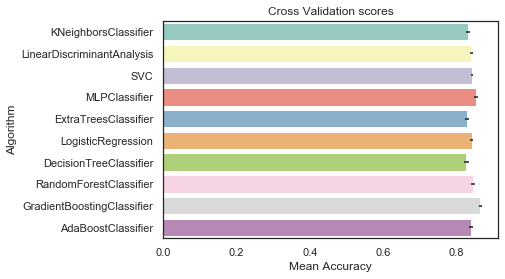

In [12]:
# CREATING A DATA FRAME OF THE CROSS VALIDATION RESULTS

cv_df = pd.DataFrame(cross_val_data)
g = sns.barplot("Cross_Val_Mean", "Algorithm", data = cv_df, palette = "Set3", orient = "h", **{'xerr' : cv_df['Cross_Val_Std']})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross Validation scores")

In [13]:
cv_df.sort_values(by = 'Cross_Val_Mean', ascending = False)

,Algorithm,Cross_Val_Mean,Cross_Val_Std
8,GradientBoostingClassifier,0.864992,0.004468
3,MLPClassifier,0.852431,0.005165
7,RandomForestClassifier,0.843955,0.005149
2,SVC,0.841682,0.003085
5,LogisticRegression,0.841283,0.004963
1,LinearDiscriminantAnalysis,0.840085,0.004608
9,AdaBoostClassifier,0.838519,0.005285
0,KNeighborsClassifier,0.831117,0.004817
4,ExtraTreesClassifier,0.829213,0.005934
6,DecisionTreeClassifier,0.827125,0.005669


## EVALUATION

In [14]:
random_state = 3

### *  Gradient Boosting Classifier

In [27]:
GBC = GradientBoostingClassifier()
GBC_grid = {
    'loss' : ['deviance'],
    'learning_rate' : [0.5],
    'n_estimators' : [100],
    'max_depth' : [3],
    'min_impurity_decrease' : [0],
    'max_features' : ['auto'],
    'verbose' : [1],
    'ccp_alpha' : [0],
}


gsgbc =  GridSearchCV(GBC, GBC_grid, cv = kfold, scoring = 'roc_auc', n_jobs = 5, verbose = 1)
gsgbc.fit(x_train, y_train)


Fitting 10 folds for each of 1 candidates, totalling 10 fits
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:   21.0s finished
      Iter       Train Loss   Remaining Time 
         1           0.8298            8.18s
         2           0.7485            8.26s
         3           0.7077            8.31s
         4           0.6751            8.18s
         5           0.6552            8.71s
         6           0.6397            8.73s
         7           0.6298            8.58s
         8           0.6214            8.53s
         9           0.6159            8.36s
        10           0.6112            8.36s
        20           0.5770            7.03s
        30           0.5631            6.06s
        40           0.5533            5.16s
        50           0.5464            4.28s
        60           0.5424            3.41s
        70           0.5374            2.61s
        80           0.5333 

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=...
                                                  subsample=1.0, tol=0.0001,
                                                  validation_fraction=0.1,
   

In [28]:
print(gsgbc.best_estimator_)
print(gsgbc.best_score_)
print(gsgbc.best_params_)

GradientBoostingClassifier(ccp_alpha=0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=3,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=1,
                           warm_start=False)
0.9268635317334992
{'ccp_alpha': 0, 'learning_rate': 0.5, 'loss': 'deviance', 'max_depth': 3, 'max_features': 'auto', 'min_impurity_decrease': 0, 'n_estimators': 100, 'verbose': 1}


In [15]:
MLP = MLPClassifier()

MLP_grid = {
    'activation' : [ 'logistic'],
    'solver' : ['adam'],
    'alpha' : [0.01],
    'learning_rate' : ['adaptive'],
    'momentum' : [0.5],
    'nesterovs_momentum' : [True],
    'beta_1' : [0.85],
    'beta_2' : [0.99],
}

gsmlp = GridSearchCV(MLP, MLP_grid, cv = kfold, scoring = 'roc_auc', n_jobs = 5, verbose = 1)
gsmlp.fit(x_train,y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:  3.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=5,
             param_grid={'activation': ['logistic'], 'alpha': [0.01],
                         'beta_1': [

In [16]:
print(gsmlp.best_estimator_)
print(gsmlp.best_score_)
print(gsmlp.best_params_)

MLPClassifier(activation='logistic', alpha=0.01, batch_size='auto', beta_1=0.85,
              beta_2=0.99, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.5, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
0.9117043602175118
{'activation': 'logistic', 'alpha': 0.01, 'beta_1': 0.85, 'beta_2': 0.99, 'learning_rate': 'adaptive', 'momentum': 0.5, 'nesterovs_momentum': True, 'solver': 'adam'}


In [24]:
RFC = RandomForestClassifier(random_state = random_state)

RFC_grid = {
    'n_estimators' : [200],
    'criterion' : ["gini"],
    'min_samples_split' : [20],
    'max_features' : ["auto"],
    'min_impurity_decrease' : [0],
    'bootstrap' : [True],
    'oob_score' : [True],
    'class_weight' : ["balanced"],
    'ccp_alpha' : [0],
}


gsrfc =  GridSearchCV(RFC, RFC_grid, cv = kfold, scoring = 'roc_auc', n_jobs = 5, verbose = 1)
gsrfc.fit(x_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:   37.9s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jobs=5,
             param_grid={'bootstrap': [True], 'ccp_alpha': [0],
          

In [25]:
print(gsrfc.best_estimator_)
print(gsrfc.best_score_)
print(gsrfc.best_params_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=True, random_state=3, verbose=0,
                       warm_start=False)
0.9128311155196881
{'bootstrap': True, 'ccp_alpha': 0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'auto', 'min_impurity_decrease': 0, 'min_samples_split': 20, 'n_estimators': 200, 'oob_score': True}


In [17]:
svc = SVC(random_state = random_state)

svc_grid = {
    'kernel' : ['linear'],
    'degree' : [3],
    'gamma' : ['scale'],
    'probability' : [True],
    'decision_function_shape' : ['ovo'],

}


gssvc =  GridSearchCV(svc, svc_grid, cv = kfold, scoring = 'roc_auc', n_jobs = 5, verbose = 1)
gssvc.fit(x_train, y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  20 out of  20 | elapsed: 87.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=3, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=5,
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'degree': [3], 'gamma': ['scale'],
                         'kernel': ['linear'], 'probability': [True]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [19]:
print(gssvc.best_estimator_)
print(gssvc.best_score_)
print(gssvc.best_params_)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=3, shrinking=True, tol=0.001,
    verbose=False)
0.891943772757155
{'decision_function_shape': 'ovo', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'probability': True}


## FEATURE IMPORTANCE

### DEFINING THE MODEL WITH BEST PARAMETERS

In [30]:
random_state = 3


#GradientBoostingClassifier
gbc_best = GradientBoostingClassifier(ccp_alpha=0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=3,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

#RandomForestClassifier
rfc_best = RandomForestClassifier(bootstrap=True, ccp_alpha=0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=True, random_state=3, verbose=0,
                       warm_start=False)

#MLPClassifier
mlp_best = MLPClassifier(activation='logistic', alpha=0.01, batch_size='auto', beta_1=0.85,
              beta_2=0.99, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.5, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

#SVC 
svc_best = SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=3, shrinking=True, tol=0.001,
    verbose=False)


### creating the dictionaries for all the models

In [40]:
classifier_dic = { 'classifiers' : [gbc_best, rfc_best, mlp_best, svc_best], 'classifier_name' : []}

#Training and Naming classifier
for num, classifier in enumerate(classifier_dic['classifiers']):
    classifier_dic['classifier_name'].append((classifier.__str__()).split('(')[0])
    classifier_dic['classifiers'][num] = classifier.fit(x_train, y_train)

Iter       Train Loss   Remaining Time 
         1           0.8298            5.42s
         2           0.7485            4.79s
         3           0.7077            4.58s
         4           0.6751            5.31s
         5           0.6552            5.23s
         6           0.6397            5.06s
         7           0.6298            4.89s
         8           0.6214            4.71s
         9           0.6159            4.60s
        10           0.6112            4.50s
        20           0.5770            3.67s
        30           0.5631            3.13s
        40           0.5533            2.91s
        50           0.5464            2.36s
        60           0.5424            1.87s
        70           0.5374            1.38s
        80           0.5333            0.94s
        90           0.5288            0.48s
       100           0.5254            0.00s


## VOTING CLASSIFIER

In [46]:
combined_classifier = VotingClassifier(estimators=[('GradientBoostingClassifier', gbc_best),('MLPClassifier', mlp_best), ('RandomForestClassifier', rfc_best), ('SVC', svc_best)], voting='soft', n_jobs=4)

combined_classifier.fit(x_train, y_train)

VotingClassifier(estimators=[('GradientBoostingClassifier',
                              GradientBoostingClassifier(ccp_alpha=0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.5,
                                                         loss='deviance',
                                                         max_depth=3,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                        

In [59]:
y_pred = combined_classifier.predict(test)
accuracy = (y_pred == y_test).sum()/len(y_pred)
print(f'The accuracy is {accuracy}')

# Exporting to a cleaned data folder
curr_dir = os.getcwd()
path = os.path.join(curr_dir, 'predictions\\prediction_1.csv')
prediction = pd.Series(y_pred, name = 'Prediction') 
prediction.to_csv(path, index = False, header = True)

The accuracy is 0.8648117437503838


In [62]:
from sklearn.metrics import confusion_matrix 

results = confusion_matrix(y_test, y_pred)
print(results)

[[11529   906]
 [ 1295  2551]]
